<a href="https://colab.research.google.com/github/alerestrepo185/alerestrepo185.github.io/blob/main/PROYECTO_8_(MACHINE_LEARNING)_RESTREPO%2C_SANTAMARIA%2C_YEPES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO # 8**

*Paula Alejandra Restrepo Velásquez*

*Andres Felipe Santamaría Robayo*

*Junior Yepes Vasquez*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
sp=pd.read_csv("economicas.csv")

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [ ]:
for sp_col in sp.columns:
  print(sp_col)
  print(sp[sp_col].unique())
  print(sp[sp_col].dtypes)
  print('---'*10)

ESTU_CONSECUTIVO
['EK202120243329' 'EK202120227314' 'EK202120088295' ... 'EK202120313923'
 'EK202120281981' 'EK202120224998']
object
------------------------------
RESULT_CODIGOPRUEBA
[2001]
int64
------------------------------
RESULT_NOMBREPRUEBA
['ANÁLISIS ECONÓMICO']
object
------------------------------
RESULT_PUNTAJE
[128 209 106  89 122  96 116 215 125 131 112 115 133 129 164 109 154  87
  84 105 162 114 111 199 203 188 142 107  98 126 123 137  72 118 168 184
 117  92 186  95  70  82 148 189 173 178 156 182  83  93 165 150 140 152
 136 127 100 146 108 166 120  90 102 124 160 139 155 187 157 169 119 170
 103 138 228 130 104 144 226  86  85 113 218 185 134 221 179 132 151 158
 200  94 194  60 149 141 210  99  91 190 174 175 145 216 172 163 193  77
 147 143 181 201  97 135 121 220  88 153   0 171  73 101  81  80  74  54
 159 202  79 243 205  64 177 222 183  75  76 167 191 110 196  68  61 208
 161 207 234 195 197 180 211 231  63 232  78  71  65 192 198 213 176 204
  69 246 206 224  4

In [ ]:
sp.pop ('ESTU_CONSECUTIVO') #Eliminar Columnas
sp.pop('RESULT_CODIGOPRUEBA')
sp.pop('RESULT_NOMBREPRUEBA')
sp.pop('ESTU_AGREGADO')
sp.pop('ESTU_TIPODOCUMENTO')
sp.pop('ESTU_NACIONALIDAD')
sp.pop('ESTU_FECHANACIMIENTO')
sp.pop('ESTU_EXTERIOR')
sp.pop('PERIODO')
sp.pop('ESTU_ESTUDIANTE')
sp.pop('ESTU_PAIS_RESIDE')
sp.pop('ESTU_COD_RESIDE_DEPTO')
sp.pop('ESTU_COD_RESIDE_MCPIO')
sp.pop('ESTU_COLE_TERMINO')
sp.pop('ESTU_CODDANE_COLE_TERMINO')
sp.pop('ESTU_COD_COLE_MCPIO_TERMINO')
sp.pop('ESTU_TITULOOBTENIDOBACHILLER')
sp.pop('ESTU_PAGOMATRICULABECA')
sp.pop('ESTU_PAGOMATRICULACREDITO')
sp.pop('ESTU_PAGOMATRICULAPADRES')
sp.pop('ESTU_PAGOMATRICULAPROPIO')
sp.pop('ESTU_VALORMATRICULAUNIVERSIDAD')
sp.pop('ESTU_COMOCAPACITOEXAMENSB11')
sp.pop('ESTU_TIPODOCUMENTOSB11')
sp.pop('ESTU_MCPIO_RESIDE') 
sp.pop('FAMI_EDUCACIONPADRE') 
sp.pop('FAMI_EDUCACIONMADRE')
sp.pop('FAMI_TRABAJOLABORPADRE') 
sp.pop('FAMI_TRABAJOLABORMADRE')
sp.pop('ESTU_OTROCOLE_TERMINO') 
sp.pop('FAMI_TIENEINTERNET') 
sp.pop('FAMI_TIENECOMPUTADOR') 
sp.pop('FAMI_TIENELAVADORA') 
sp.pop('FAMI_TIENEHORNOMICROOGAS')
sp.pop('FAMI_TIENESERVICIOTV') 
sp.pop('FAMI_TIENEAUTOMOVIL') 
sp.pop('FAMI_TIENEMOTOCICLETA')
sp.pop('FAMI_TIENECONSOLAVIDEOJUEGOS')
sp.pop('FAMI_CUANTOSCOMPARTEBAÑO')
sp.pop('ESTU_PRESENTACIONCASA') 
sp.pop('ESTU_PAISDOCUMENTOS11')
sp.pop('ESTU_HORASSEMANATRABAJA') 
sp.pop('INST_COD_INSTITUCION')
sp.pop('INST_NOMBRE_INSTITUCION') 
sp.pop('ESTU_PRGM_ACADEMICO')
sp.pop('ESTU_SNIES_PRGMACADEMICO') 
sp.pop('GRUPOREFERENCIA')
sp.pop('ESTU_PRGM_CODMUNICIPIO')
sp.pop('ESTU_PRGM_MUNICIPIO') 
sp.pop('ESTU_PRGM_DEPARTAMENTO')
sp.pop('ESTU_NIVEL_PRGM_ACADEMICO') 
sp.pop('ESTU_METODO_PRGM')
sp.pop('ESTU_NUCLEO_PREGRADO')
sp.pop('ESTU_INST_CODMUNICIPIO')
sp.pop('ESTU_INST_MUNICIPIO')
sp.pop('ESTU_INST_DEPARTAMENTO') 
sp.pop('INST_CARACTER_ACADEMICO') 
sp.pop('INST_ORIGEN')
sp.pop('ESTU_PRIVADO_LIBERTAD') 
sp.pop('ESTU_COD_MCPIO_PRESENTACION')
sp.pop('ESTU_MCPIO_PRESENTACION') 
sp.pop('ESTU_DEPTO_PRESENTACION')
sp.pop('ESTU_COD_DEPTO_PRESENTACION')
sp.pop('ESTU_INSE_INDIVIDUAL')
sp.pop('ESTU_NSE_INDIVIDUAL')
sp.pop('ESTU_NSE_IES') 
sp.pop('ESTU_ESTADOINVESTIGACION')
sp.pop('ESTU_SEMESTRECURSA') 

0        06
1        07
2        08
3        08
4        09
       ... 
3850     08
3851    NaN
3852    NaN
3853    NaN
3854     09
Name: ESTU_SEMESTRECURSA, Length: 3855, dtype: object

In [ ]:
int_Var = sp.select_dtypes('int64').columns

In [ ]:
for sp_col in int_Var:
  sp[sp_col] = sp[sp_col].astype('int16') #disminuir memoria en uso

In [ ]:
for sp_col, por in ((sp.isna().sum() / sp.shape[0])*100).to_dict().items():
  print(f"En la columna '{sp_col}' hace falta el {round(por,4)}% de los datos") #Mssing Values

En la columna 'RESULT_PUNTAJE' hace falta el 0.0% de los datos
En la columna 'RESULT_DESEMPENO' hace falta el 0.0% de los datos
En la columna 'ESTU_GENERO' hace falta el 0.0% de los datos
En la columna 'ESTU_DEPTO_RESIDE' hace falta el 0.0% de los datos
En la columna 'ESTU_AREARESIDE' hace falta el 0.0778% de los datos
En la columna 'FAMI_ESTRATOVIVIENDA' hace falta el 3.476% de los datos
En la columna 'MOD_RAZONA_CUANTITAT_PUNT' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITAT_DESEM' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITATIVO_PNAL' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITATIVO_PNBC' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_PUNT' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_DESEM' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_PNAL' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_PNBC' hace falta el 0.0% de los datos
En la column

In [ ]:
sp['MOD_COMUNI_ESCRITA_DESEM'].fillna(sp['MOD_COMUNI_ESCRITA_DESEM'].mean(), inplace=True)
sp['FAMI_ESTRATOVIVIENDA'].fillna(sp['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)
sp['ESTU_AREARESIDE'].fillna(sp['ESTU_AREARESIDE'].mode()[0], inplace=True)

In [ ]:
for sp_col, por in ((sp.isna().sum() / sp.shape[0])*100).to_dict().items():
  print(f"En la columna '{sp_col}' hace falta el {round(por,4)}% de los datos") #Mssing Values

En la columna 'RESULT_PUNTAJE' hace falta el 0.0% de los datos
En la columna 'RESULT_DESEMPENO' hace falta el 0.0% de los datos
En la columna 'ESTU_GENERO' hace falta el 0.0% de los datos
En la columna 'ESTU_DEPTO_RESIDE' hace falta el 0.0% de los datos
En la columna 'ESTU_AREARESIDE' hace falta el 0.0% de los datos
En la columna 'FAMI_ESTRATOVIVIENDA' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITAT_PUNT' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITAT_DESEM' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITATIVO_PNAL' hace falta el 0.0% de los datos
En la columna 'MOD_RAZONA_CUANTITATIVO_PNBC' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_PUNT' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_DESEM' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_PNAL' hace falta el 0.0% de los datos
En la columna 'MOD_LECTURA_CRITICA_PNBC' hace falta el 0.0% de los datos
En la columna 'MO

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RESULT_PUNTAJE                3855 non-null   int16  
 1   RESULT_DESEMPENO              3855 non-null   int16  
 2   ESTU_GENERO                   3855 non-null   object 
 3   ESTU_DEPTO_RESIDE             3855 non-null   object 
 4   ESTU_AREARESIDE               3855 non-null   object 
 5   FAMI_ESTRATOVIVIENDA          3855 non-null   object 
 6   MOD_RAZONA_CUANTITAT_PUNT     3855 non-null   int16  
 7   MOD_RAZONA_CUANTITAT_DESEM    3855 non-null   int16  
 8   MOD_RAZONA_CUANTITATIVO_PNAL  3855 non-null   int16  
 9   MOD_RAZONA_CUANTITATIVO_PNBC  3855 non-null   int16  
 10  MOD_LECTURA_CRITICA_PUNT      3855 non-null   int16  
 11  MOD_LECTURA_CRITICA_DESEM     3855 non-null   int16  
 12  MOD_LECTURA_CRITICA_PNAL      3855 non-null   int16  
 13  MOD

In [ ]:
sp.drop(sp.columns[[2,3,4,5,19,23]], axis='columns',inplace=True)

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   RESULT_PUNTAJE                3855 non-null   int16
 1   RESULT_DESEMPENO              3855 non-null   int16
 2   MOD_RAZONA_CUANTITAT_PUNT     3855 non-null   int16
 3   MOD_RAZONA_CUANTITAT_DESEM    3855 non-null   int16
 4   MOD_RAZONA_CUANTITATIVO_PNAL  3855 non-null   int16
 5   MOD_RAZONA_CUANTITATIVO_PNBC  3855 non-null   int16
 6   MOD_LECTURA_CRITICA_PUNT      3855 non-null   int16
 7   MOD_LECTURA_CRITICA_DESEM     3855 non-null   int16
 8   MOD_LECTURA_CRITICA_PNAL      3855 non-null   int16
 9   MOD_LECTURA_CRITICA_PNBC      3855 non-null   int16
 10  MOD_COMPETEN_CIUDADA_PUNT     3855 non-null   int16
 11  MOD_COMPETEN_CIUDADA_DESEM    3855 non-null   int16
 12  MOD_COMPETEN_CIUDADA_PNAL     3855 non-null   int16
 13  MOD_COMPETEN_CIUDADA_PNBC     385

In [ ]:
scal = StandardScaler()
sp_scal = scal.fit_transform(sp)

pca = PCA(n_components=2)
sp_pca = pca.fit_transform(sp_scal)

pca_2 = pd.DataFrame(sp_pca, columns=['PC1','PC2'])

In [ ]:
pca_2

,PC1,PC2
0,-4.155424,-0.096139
1,-6.888691,2.190895
2,8.131929,-2.250490
3,-0.150596,-2.743818
4,-0.018031,-2.185468
...,...,...
3850,-5.265340,0.396865
3851,-5.319884,-0.532269
3852,1.482619,1.116148
3853,6.356603,-0.464560


In [ ]:
pca3 = PCA()

pca3.fit(sp_scal)

PCA()

In [ ]:
pca3.explained_variance_

array([1.48260782e+01, 2.17532960e+00, 1.58338740e+00, 1.43819476e+00,
       1.05352965e+00, 9.01892466e-01, 1.98123879e-01, 1.66468392e-01,
       1.18110460e-01, 1.07528737e-01, 9.12636852e-02, 8.54014299e-02,
       6.28965729e-02, 5.89564703e-02, 3.25952602e-02, 2.71842505e-02,
       2.29067573e-02, 2.02494681e-02, 1.19181854e-02, 1.08526577e-02,
       8.99089969e-03, 4.03006052e-03, 7.86341576e-05])

In [ ]:
pca3.explained_variance_ratio_

array([6.44444879e-01, 9.45550134e-02, 6.88250724e-02, 6.25139866e-02,
       4.57937547e-02, 3.92025440e-02, 8.61184717e-03, 7.23587867e-03,
       5.13390528e-03, 4.67394972e-03, 3.96695700e-03, 3.71214246e-03,
       2.73392423e-03, 2.56265986e-03, 1.41681760e-03, 1.18161734e-03,
       9.95687618e-04, 8.80183274e-04, 5.18047554e-04, 4.71732283e-04,
       3.90807279e-04, 1.75174570e-04, 3.41798955e-06])

In [ ]:
pca3.explained_variance_ratio_.shape

(23,)

In [ ]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.64444488, 0.73899989, 0.80782496, 0.87033895, 0.91613271,
       0.95533525, 0.9639471 , 0.97118298, 0.97631688, 0.98099083,
       0.98495779, 0.98866993, 0.99140385, 0.99396651, 0.99538333,
       0.99656495, 0.99756064, 0.99844082, 0.99895887, 0.9994306 ,
       0.99982141, 0.99999658, 1.        ])

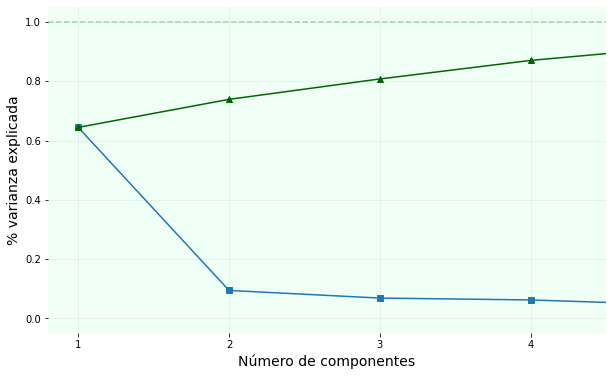

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_facecolor('#EFFFF5')
plt.plot(np.arange(1,24,1), pca3.explained_variance_ratio_, marker='s', label='varianza_explicada')
plt.plot(np.arange(1,24,1),np.cumsum(pca3.explained_variance_ratio_), marker='^', color='darkgreen', label='varianza_acumulada')
plt.xlim(0.8,4.5)
plt.ylim(-0.05,1.05)
plt.xticks(ticks=np.arange(1,5,1))
plt.axhline(1, ls='--', color='g', alpha=0.3)
plt.xlabel('Número de componentes', size=14)
plt.ylabel('% varianza explicada', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(alpha=0.2, axis='both')
plt.show()

In [ ]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [ ]:
sklearn_loadings

array([[-0.68802419, -0.09757071],
       [-0.68916132, -0.04976611],
       [-0.8383694 , -0.06118694],
       [-0.79696741, -0.06621542],
       [-0.83381115, -0.06563735],
       [-0.84117083, -0.06647969],
       [-0.86021707, -0.14477058],
       [-0.82904006, -0.13783076],
       [-0.86258032, -0.14647845],
       [-0.86822666, -0.14065196],
       [-0.8432602 , -0.20366051],
       [-0.81983514, -0.20222585],
       [-0.8530114 , -0.20276071],
       [-0.86560323, -0.19512678],
       [-0.70855649, -0.05903093],
       [-0.72492111, -0.05818853],
       [-0.73959676, -0.04961308],
       [-0.53127014,  0.77411152],
       [-0.56608539,  0.79502515],
       [-0.56844159,  0.79582273],
       [-0.97596199,  0.11271399],
       [-0.98044263,  0.09519499],
       [-0.96824973,  0.08931263]])

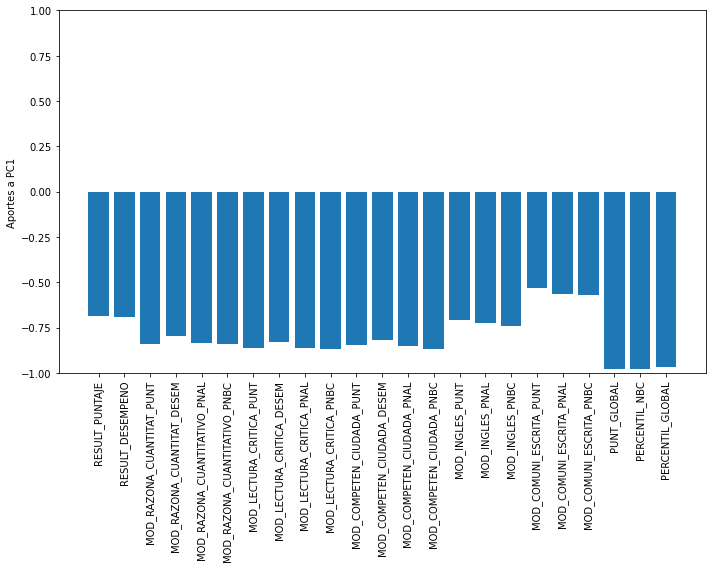

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(range(23), sklearn_loadings[:, 0], align='center') 
ax.set_ylabel('Aportes a PC1')
ax.set_xticks(range(23))
ax.set_xticklabels(sp.columns, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

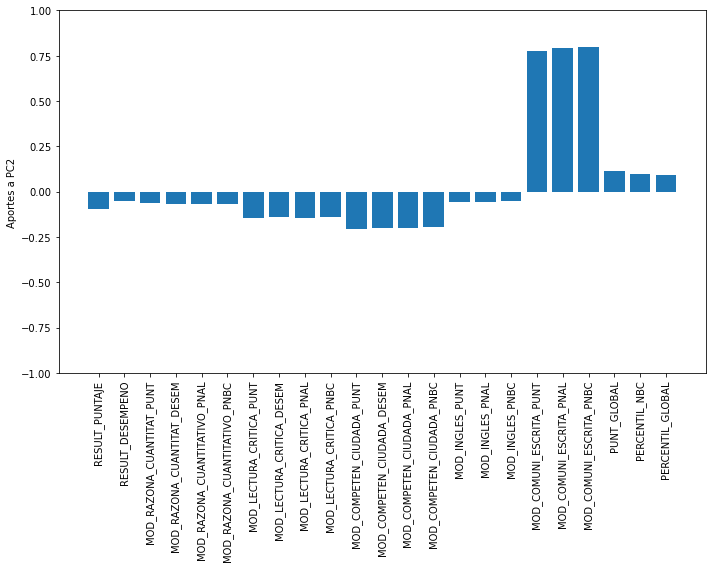

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(range(23), sklearn_loadings[:, 1], align='center') 
ax.set_ylabel('Aportes a PC2')
ax.set_xticks(range(23))
ax.set_xticklabels(sp.columns, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [ ]:
pca_2

,PC1,PC2
0,-4.155424,-0.096139
1,-6.888691,2.190895
2,8.131929,-2.250490
3,-0.150596,-2.743818
4,-0.018031,-2.185468
...,...,...
3850,-5.265340,0.396865
3851,-5.319884,-0.532269
3852,1.482619,1.116148
3853,6.356603,-0.464560


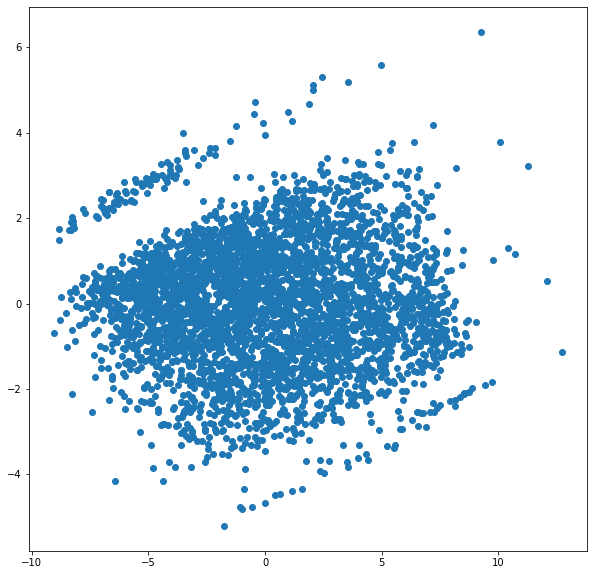

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(pca_2['PC1'],pca_2['PC2'])

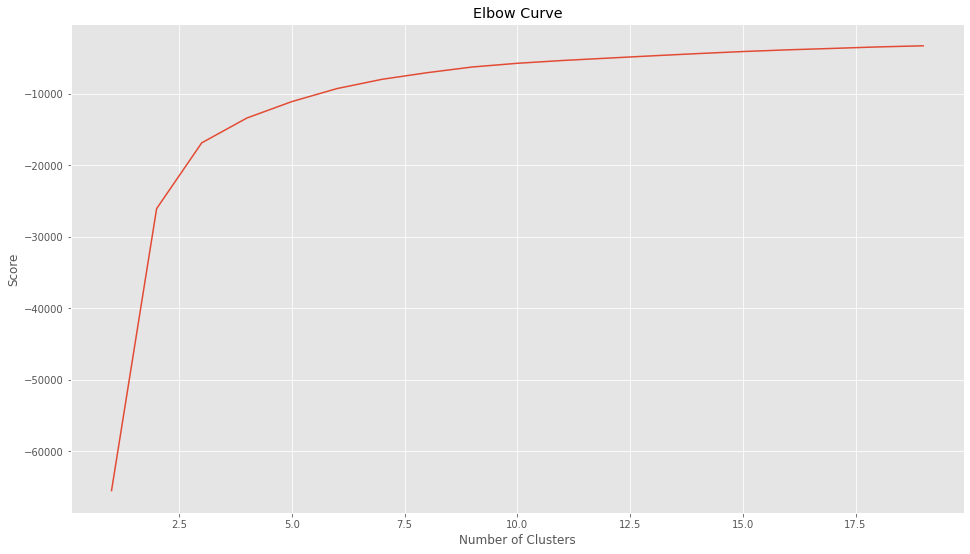

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(pca_2).score(pca_2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(pca_2)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.91053318  0.04798002]
 [-4.33464729  0.0268744 ]
 [ 0.12805907 -0.05351149]]


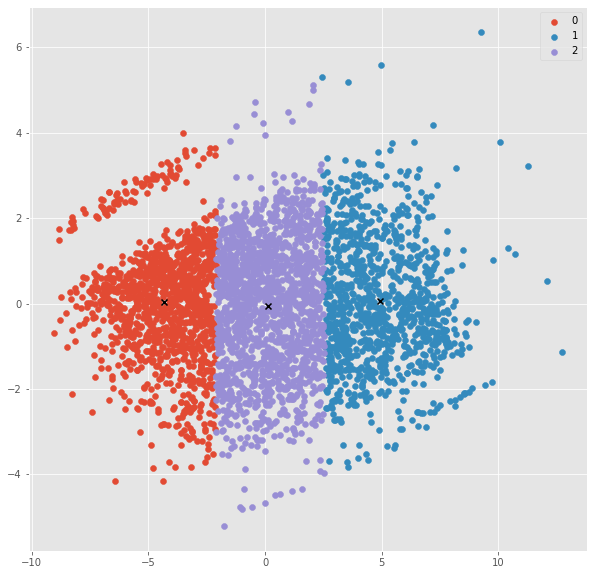

In [ ]:
centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(sp_pca)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(sp_pca[label == i , 0] , sp_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=1).fit(pca_2)
labels = kmeans.labels_
davies_bouldin_score(pca_2, labels)

0.8181034488084803

- **Según el indice Davies–Bouldin que explica la similitud promedio entre grupos, donde entre mas cercano a 0 indicarían una mejor partición, el valor estimado para este caso es de 0.8181 refiriendo asi un bajo nivel de agrupamiento de estos grupos encontrados, es decir, dichos grupos mantendrían mucha dispersión entre sí; para el caso de los resultados de los examenes Saber-pro, existiría dispersión significativa entre los grupos captados mediante este algoritmo**